In [4]:
!pip install pandas_datareader

In [12]:
from pandas_datareader import data as pdr
import yfinance as yf
yf.pdr_override()

import pandas as pd
import matplotlib.pyplot as plt
import mplfinance as mpl

import datetime as dt
import time
import calendar

import pandas as pd
from pandas import DataFrame
import pandas_datareader.data as web
#import pandas.plotting
from pandas.plotting import register_matplotlib_converters
#import pandas.testing
from pandas.testing import assert_frame_equal
import numpy as np

AttributeError: module 'yfinance' has no attribute 'pdr_override'

In [14]:
simbol = "GC=F"
start = dt.datetime(2023,1,1)
end   = dt.datetime.now()

df = web.get_data_yahoo(simbol, start, end)

print(df.tail(6))

NameError: name 'dt' is not defined

In [9]:
mpl.plot(df, type="candle")

NameError: name 'mpl' is not defined

# User
analizeaza pretul aurului pe bursa

[*********************100%***********************]  1 of 1 completed


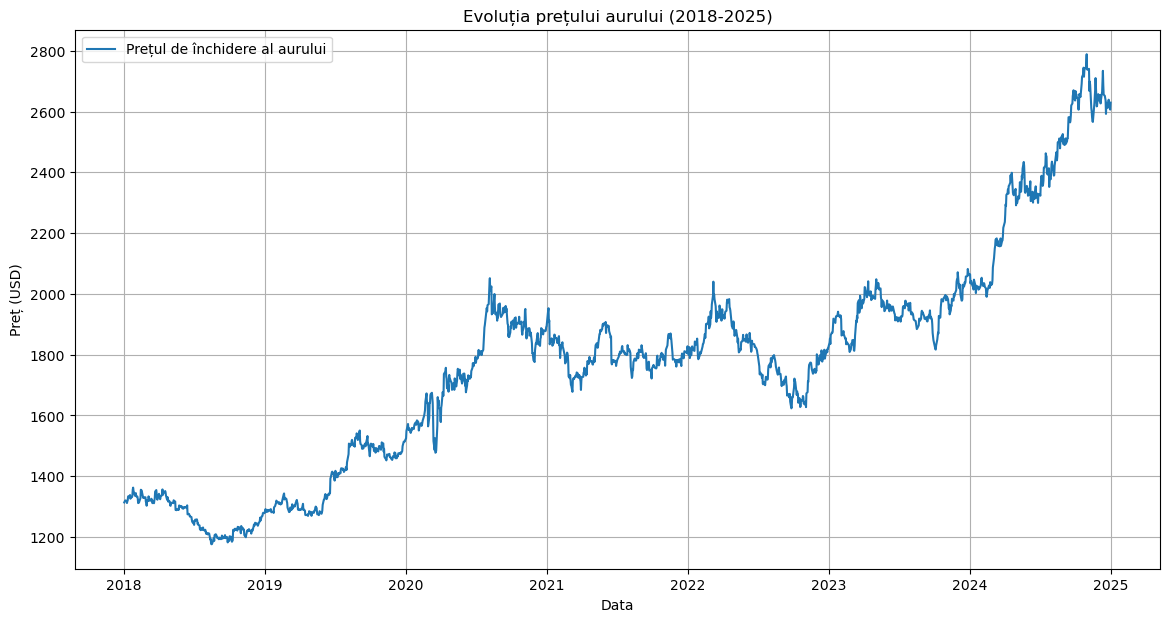

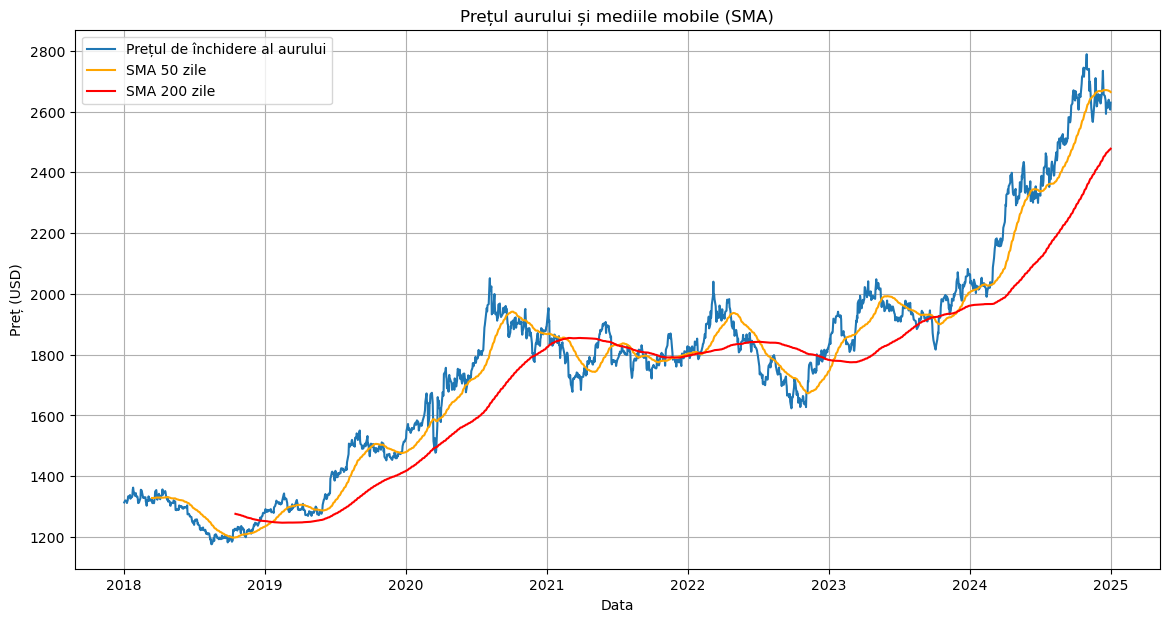

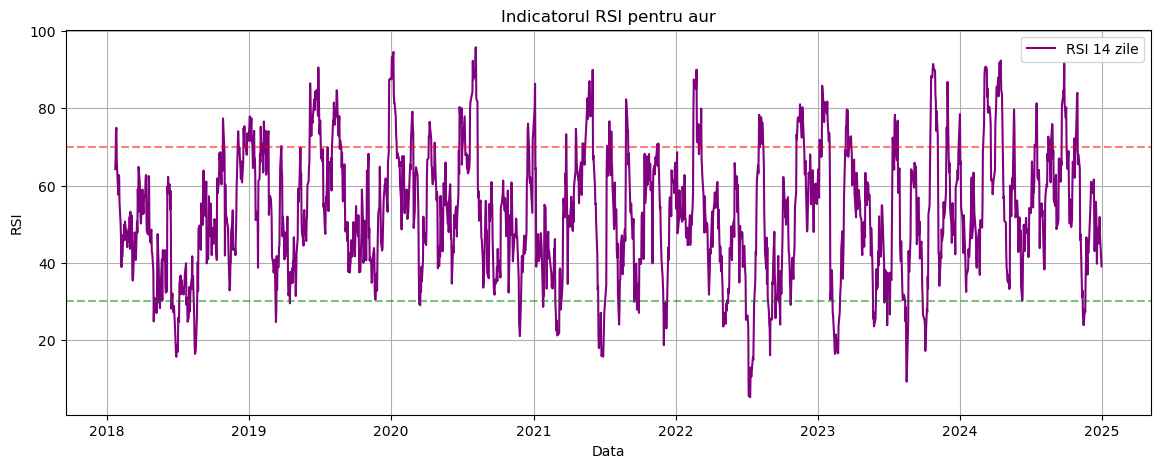

In [21]:
# Pasul 1: Instalarea bibliotecilor necesare (în cazul în care nu sunt instalate)
#!pip install yfinance matplotlib pandas

# Pasul 2: Importarea bibliotecilor necesare
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd

# Pasul 3: Obținerea datelor istorice pentru aur (simbol: 'GC=F' pentru Gold Futures)
# Aici folosim intervalul de 5 ani de date istorice
gold_data = yf.download('GC=F', start='2018-01-01', end='2025-01-01')

# Pasul 4: Vizualizarea evoluției prețului aurului
plt.figure(figsize=(14,7))
plt.plot(gold_data['Close'], label='Prețul de închidere al aurului')
plt.title('Evoluția prețului aurului (2018-2025)')
plt.xlabel('Data')
plt.ylabel('Preț (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Pasul 5: Calcularea unei medii mobile simple (SMA) de 50 și 200 de zile
gold_data['SMA_50'] = gold_data['Close'].rolling(window=50).mean()
gold_data['SMA_200'] = gold_data['Close'].rolling(window=200).mean()

# Pasul 6: Vizualizarea graficului cu mediile mobile
plt.figure(figsize=(14,7))
plt.plot(gold_data['Close'], label='Prețul de închidere al aurului')
plt.plot(gold_data['SMA_50'], label='SMA 50 zile', color='orange')
plt.plot(gold_data['SMA_200'], label='SMA 200 zile', color='red')
plt.title('Prețul aurului și mediile mobile (SMA)')
plt.xlabel('Data')
plt.ylabel('Preț (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Pasul 7: Calcularea indicatorului RSI (Relative Strength Index)
def calculate_RSI(data, window=14):
    delta = data.diff(1)
    gain = delta.where(delta > 0, 0)
    loss = -delta.where(delta < 0, 0)
    
    avg_gain = gain.rolling(window=window).mean()
    avg_loss = loss.rolling(window=window).mean()
    
    rs = avg_gain / avg_loss
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

gold_data['RSI'] = calculate_RSI(gold_data['Close'])

# Pasul 8: Vizualizarea RSI
plt.figure(figsize=(14,5))
plt.plot(gold_data['RSI'], label='RSI 14 zile', color='purple')
plt.axhline(70, linestyle='--', alpha=0.5, color='red')
plt.axhline(30, linestyle='--', alpha=0.5, color='green')
plt.title('Indicatorul RSI pentru aur')
plt.xlabel('Data')
plt.ylabel('RSI')
plt.legend()
plt.grid(True)
plt.show()
